In [1]:
import pandas as pd
from IPython.display import display
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,15),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

import scipy

import sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor


<h3>NOTE. For this lab you need subsample with 5-10 random variables, at least half of them should be described with continuous random variable type. Target variable should be continuous.

<h3>Step 1. You need to make a non-parametric estimation of PDF in form of histogram and using kernel density function for MRV (or probability law in case of discrete MRV)</h3>

In [2]:
df=pd.read_csv("..\\M&M MSA\\Dataset\\df_wine.csv",index_col=0)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,type_code
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red,0


In [3]:
variables = ["fixed acidity","residual sugar","chlorides","total sulfur dioxide","density","sulphates","pH","alcohol"]

target="pH"
X=["fixed acidity","residual sugar","chlorides","total sulfur dioxide","density","sulphates","alcohol"]
#5000 samples
subsample = df[variables].sample(5000, replace=False, random_state=7266)

print(subsample.shape)
print(subsample.dtypes)
subsample

(5000, 8)
fixed acidity           float64
residual sugar          float64
chlorides               float64
total sulfur dioxide    float64
density                 float64
sulphates               float64
pH                      float64
alcohol                 float64
dtype: object


,fixed acidity,residual sugar,chlorides,total sulfur dioxide,density,sulphates,pH,alcohol
6247,6.9,2.8,0.081,41.0,0.99518,0.52,3.41,10.8
5977,7.9,8.3,0.050,278.0,0.99316,0.51,3.01,12.3
1194,6.2,8.3,0.025,216.0,0.99640,0.60,3.33,9.6
6233,6.6,2.4,0.069,40.0,0.99387,0.66,3.38,12.6
5799,7.4,2.4,0.080,33.0,0.99736,0.69,3.58,10.8
...,...,...,...,...,...,...,...,...
5617,7.1,3.9,0.086,45.0,0.99760,0.54,3.46,9.5
1994,7.0,14.6,0.043,168.0,0.99940,0.67,3.34,8.8
5333,12.3,2.3,0.091,18.0,1.00040,0.49,3.16,9.5
1509,7.9,1.6,0.053,144.0,0.99300,0.47,3.16,10.5


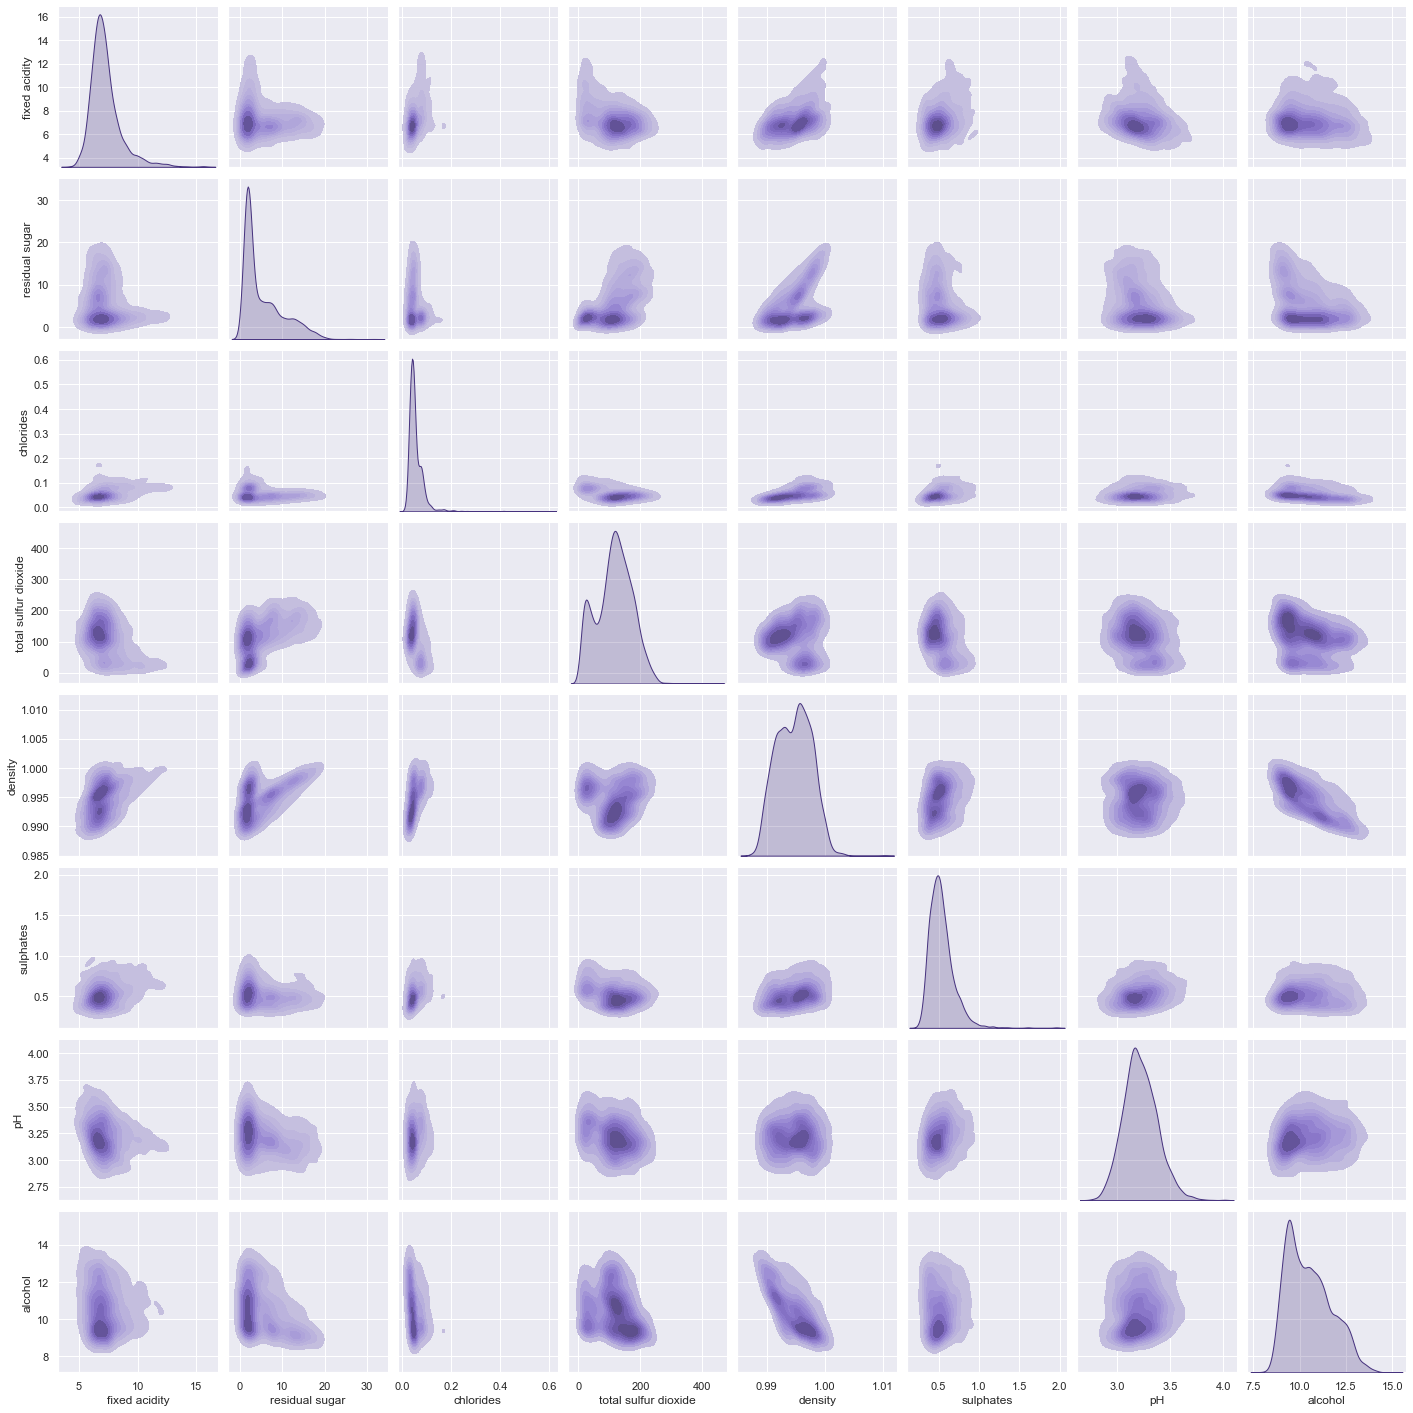

In [13]:
sns.set_theme(palette="viridis")
sns.pairplot(data=subsample, palette="viridis", kind='kde',plot_kws = {'fill':True})

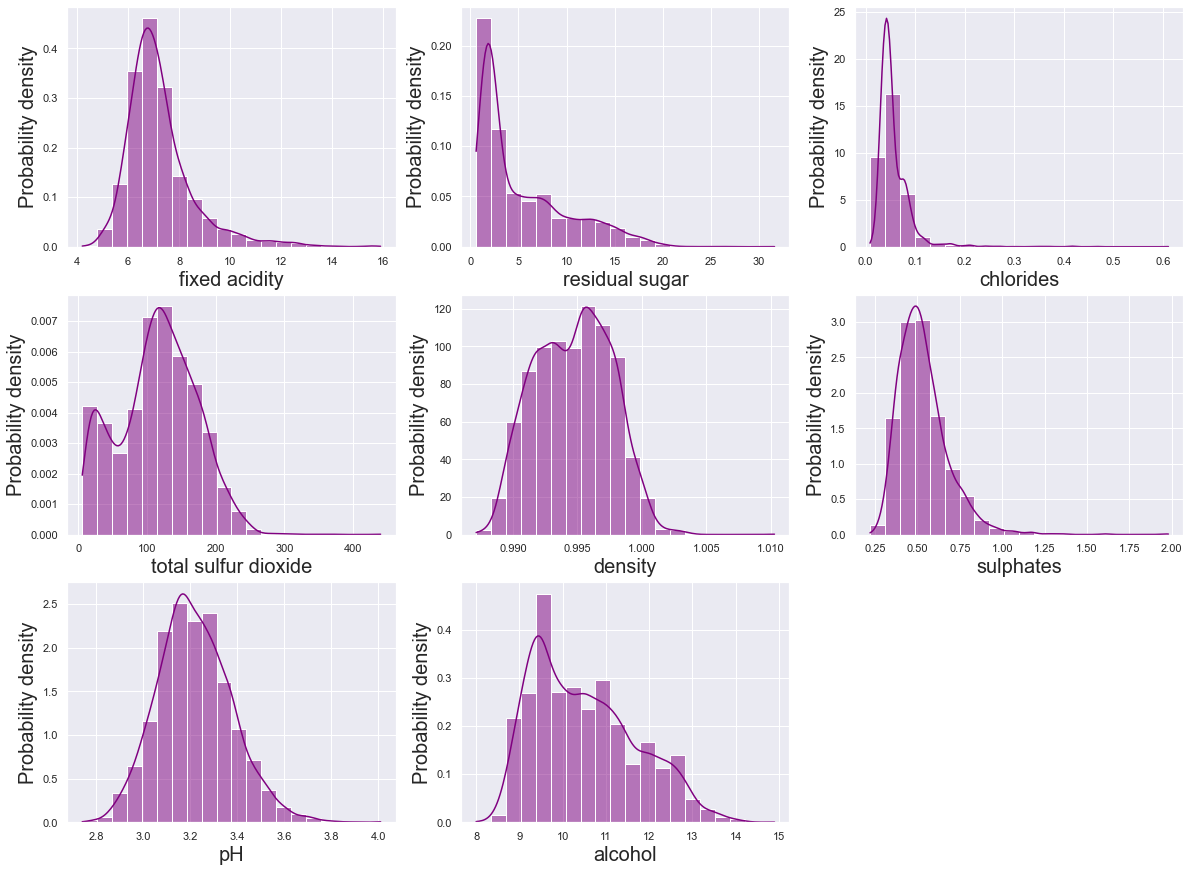

In [32]:
for i in range(0,8):
    plt.subplot(3, 3, i+1)

    col=variables[i]

    ax=sns.histplot(subsample[col],stat="density",bins=20,common_norm=False,color="purple",kde=True)
    ax.set(ylabel="Probability density")

<h3>Step 2. You need to make an estimation of multivariate mathematical expectation and variance.</h3>

In [33]:
subsample.agg([np.mean,np.var])


,fixed acidity,residual sugar,chlorides,total sulfur dioxide,density,sulphates,pH,alcohol
mean,7.233420,5.397220,0.056149,115.383500,0.994680,0.532660,3.219474,10.507036
var,1.748315,21.797138,0.001196,3209.230624,0.000009,0.022538,0.025115,1.410756


<h3>Step 3. You need to make a non-parametric estimation of conditional distributions, mathematical expectations and variances.</h3>

In [37]:
subsample_X=subsample[X]
display(subsample_X)

subsample_Y=subsample[target]
subsample_Y

,fixed acidity,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol
6247,6.9,2.8,0.081,41.0,0.99518,0.52,10.8
5977,7.9,8.3,0.050,278.0,0.99316,0.51,12.3
1194,6.2,8.3,0.025,216.0,0.99640,0.60,9.6
6233,6.6,2.4,0.069,40.0,0.99387,0.66,12.6
5799,7.4,2.4,0.080,33.0,0.99736,0.69,10.8
...,...,...,...,...,...,...,...
5617,7.1,3.9,0.086,45.0,0.99760,0.54,9.5
1994,7.0,14.6,0.043,168.0,0.99940,0.67,8.8
5333,12.3,2.3,0.091,18.0,1.00040,0.49,9.5
1509,7.9,1.6,0.053,144.0,0.99300,0.47,10.5


6247    3.41
5977    3.01
1194    3.33
6233    3.38
5799    3.58
        ... 
5617    3.46
1994    3.34
5333    3.16
1509    3.16
4073    3.19
Name: pH, Length: 5000, dtype: float64

In [40]:
display(subsample_Y.describe())
subsample_Y.median()

count    5000.000000
mean        3.219474
std         0.158476
min         2.740000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

3.21

Conditional values:

In [42]:
subsample_high_ph=subsample[subsample.pH>3.2]
subsample_low_ph=subsample[subsample.pH<=3.2]

display(subsample_high_ph)
display(subsample_low_ph)

,fixed acidity,residual sugar,chlorides,total sulfur dioxide,density,sulphates,pH,alcohol
6247,6.9,2.8,0.081,41.0,0.99518,0.52,3.41,10.8
1194,6.2,8.3,0.025,216.0,0.99640,0.60,3.33,9.6
6233,6.6,2.4,0.069,40.0,0.99387,0.66,3.38,12.6
5799,7.4,2.4,0.080,33.0,0.99736,0.69,3.58,10.8
6395,6.9,2.3,0.054,16.0,0.99508,0.63,3.45,11.5
...,...,...,...,...,...,...,...,...
1702,6.5,4.2,0.046,114.0,0.99550,0.35,3.25,8.6
6176,8.0,2.3,0.075,81.0,0.99688,0.54,3.24,9.5
15,6.6,1.5,0.032,112.0,0.99140,0.55,3.25,11.4
5617,7.1,3.9,0.086,45.0,0.99760,0.54,3.46,9.5


,fixed acidity,residual sugar,chlorides,total sulfur dioxide,density,sulphates,pH,alcohol
5977,7.9,8.3,0.050,278.0,0.99316,0.51,3.01,12.3
1149,6.7,7.2,0.038,220.0,0.99520,0.35,3.14,9.5
4628,6.1,2.6,0.041,99.0,0.99153,0.50,3.18,10.9
2293,7.3,6.5,0.037,97.0,0.99148,0.58,3.16,12.6
4582,6.3,6.3,0.048,146.0,0.99430,1.01,3.10,10.5
...,...,...,...,...,...,...,...,...
1439,6.1,7.6,0.052,226.0,0.99560,0.47,3.16,8.9
3995,8.0,4.7,0.038,127.0,0.99186,0.72,2.90,12.1
5333,12.3,2.3,0.091,18.0,1.00040,0.49,3.16,9.5
1509,7.9,1.6,0.053,144.0,0.99300,0.47,3.16,10.5


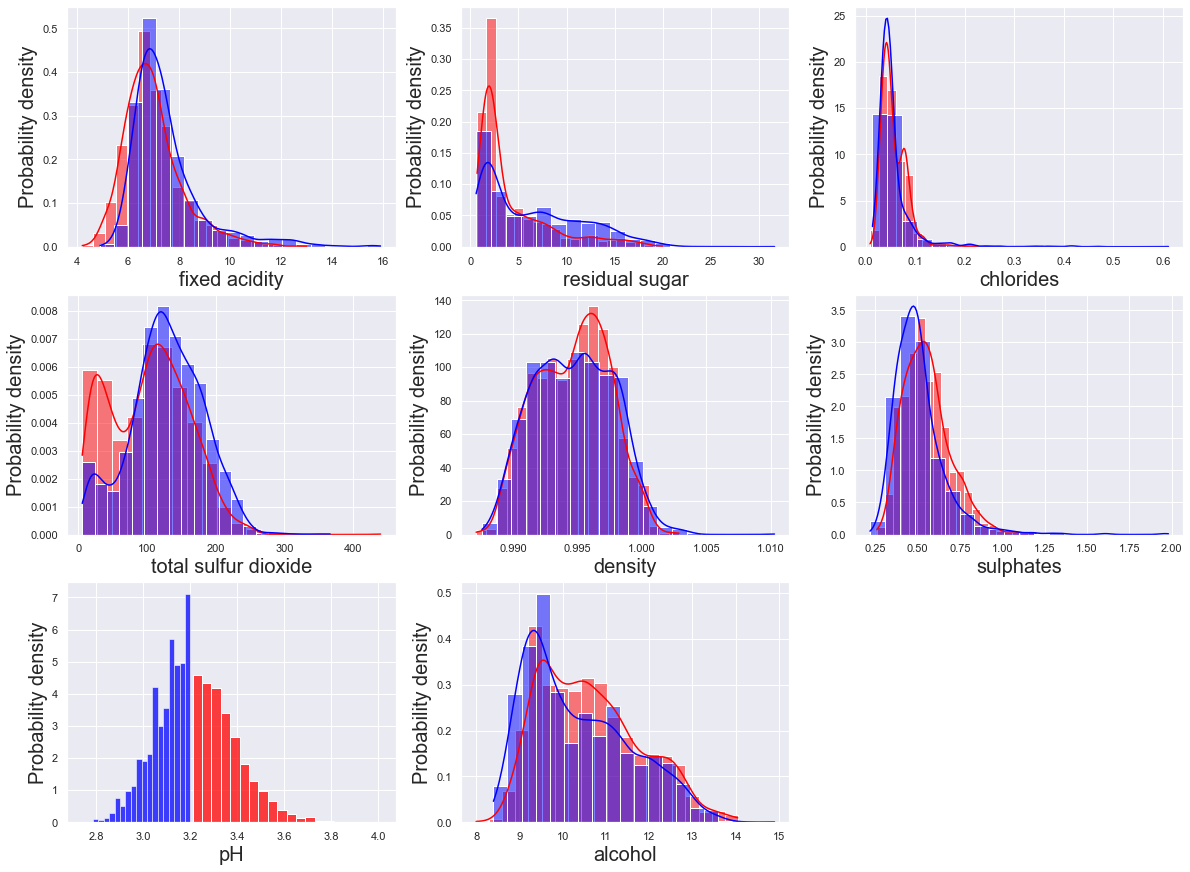

In [45]:
#Distributions
for i in range(0,8):
    plt.subplot(3, 3, i+1)

    col=variables[i]

    isKde=True
    if(col=="pH"):
        isKde=False
    ax=sns.histplot(subsample_high_ph[col],stat="density",bins=20,common_norm=False,color="red",kde=isKde)
    sns.histplot(subsample_low_ph[col],stat="density",bins=20,common_norm=False,color="blue",kde=isKde)
    ax.set(ylabel="Probability density")

In [47]:
print("pH<=3.2")
display(subsample_high_ph.agg([np.mean,np.var]))
print("pH>3.2")
display(subsample_high_ph.agg([np.mean,np.var]))

pH<=3.2


,fixed acidity,residual sugar,chlorides,total sulfur dioxide,density,sulphates,pH,alcohol
mean,6.977857,4.284599,0.057204,102.555556,0.994636,0.556267,3.343286,10.648892
var,1.373443,15.249805,0.000777,3272.707850,0.000008,0.019623,0.011847,1.334449


pH>3.2


,fixed acidity,residual sugar,chlorides,total sulfur dioxide,density,sulphates,pH,alcohol
mean,6.977857,4.284599,0.057204,102.555556,0.994636,0.556267,3.343286,10.648892
var,1.373443,15.249805,0.000777,3272.707850,0.000008,0.019623,0.011847,1.334449


<h3>Step 4. You need to make an estimation of pair correlation coefficients, confidence intervals for them and significance levels.</h3>

<AxesSubplot:>

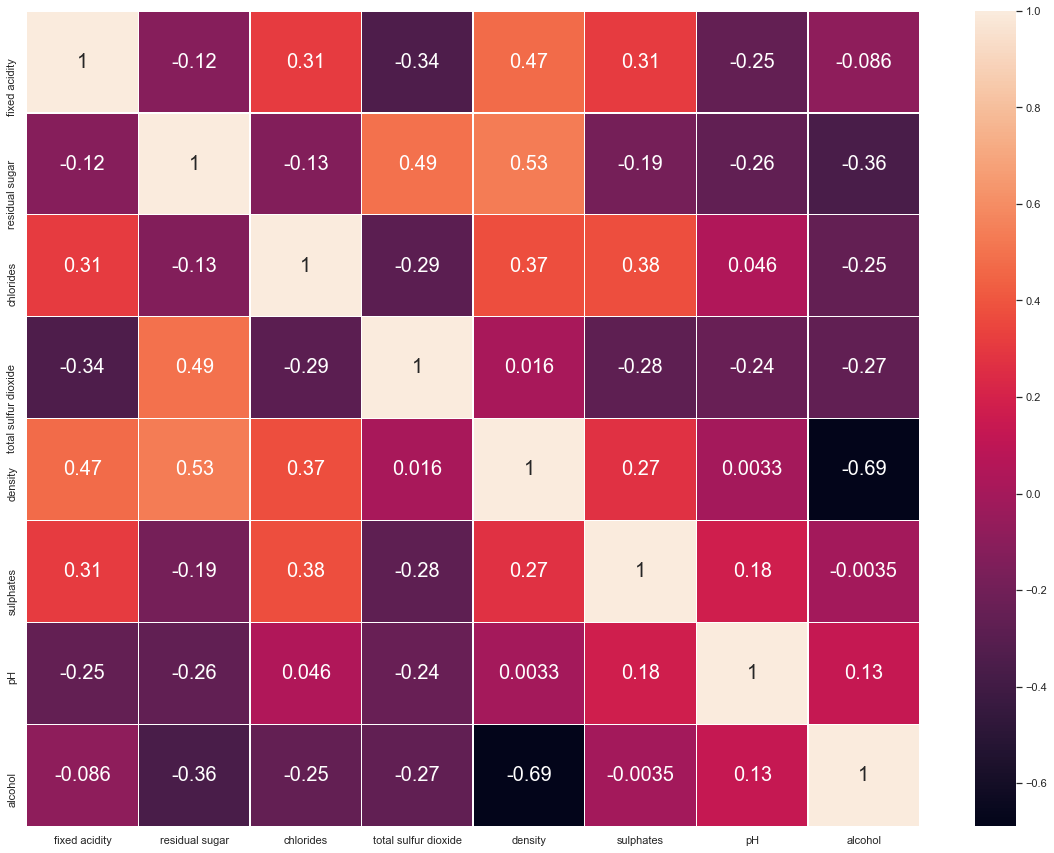

In [49]:
corr=subsample.corr()
sns.heatmap(corr,annot=True, linewidths=.5)


In [51]:
#From workshop 2, task 2
def find_conf_int(x,y):
    r, p = scipy.stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    alpha = 0.05
    z = scipy.stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    return r,p,lo_z,hi_z

In [87]:
r=np.zeros((8,8))
p=np.zeros((8,8))
lo_z=np.zeros((8,8))
hi_z=np.zeros((8,8))
conf_ints=np.zeros((8,8),dtype=object)

#to compute results only for data under the diagonal for i range(1,8), for j range(0,i)
for i in range(0,8):
    for j in range(0,8):
        if(i!=j):
            var1=variables[i]
            var2=variables[j]

            r[i,j],p[i,j],lo_z[i,j],hi_z[i,j]=find_conf_int(subsample[var1],subsample[var2])
            conf_ints[i,j]=[np.round(lo_z[i,j],4),np.round(hi_z[i,j],4)]

#just to save order from df
col_names=subsample.columns
rename_dict={i:col_names[i] for i in range(0,8)}

r=pd.DataFrame(r)
p=pd.DataFrame(p)
conf_ints=pd.DataFrame(conf_ints)


r=r.rename(columns=rename_dict,index=rename_dict)
p=p.rename(columns=rename_dict,index=rename_dict)


display(r)
display(p)
display(conf_ints)

,fixed acidity,residual sugar,chlorides,total sulfur dioxide,density,sulphates,pH,alcohol
fixed acidity,0.000000,-0.119547,0.309520,-0.341761,0.473767,0.311768,-0.253815,-0.085740
residual sugar,-0.119547,0.000000,-0.133833,0.493217,0.533512,-0.186134,-0.263326,-0.360923
chlorides,0.309520,-0.133833,0.000000,-0.289512,0.374988,0.378182,0.046118,-0.254879
total sulfur dioxide,-0.341761,0.493217,-0.289512,0.000000,0.015703,-0.277053,-0.236171,-0.265288
density,0.473767,0.533512,0.374988,0.015703,0.000000,0.270869,0.003295,-0.689315
sulphates,0.311768,-0.186134,0.378182,-0.277053,0.270869,0.000000,0.180263,-0.003522
pH,-0.253815,-0.263326,0.046118,-0.236171,0.003295,0.180263,0.000000,0.129798
alcohol,-0.085740,-0.360923,-0.254879,-0.265288,-0.689315,-0.003522,0.129798,0.000000


,fixed acidity,residual sugar,chlorides,total sulfur dioxide,density,sulphates,pH,alcohol
fixed acidity,0.000000e+00,2.222136e-17,1.832062e-111,5.236244e-137,3.197112e-278,3.819623e-113,2.373496e-74,1.260005e-09
residual sugar,2.222136e-17,0.000000e+00,2.022976e-21,6.970315e-305,0.000000e+00,3.253331e-40,4.356145e-80,1.051448e-153
chlorides,1.832062e-111,2.022976e-21,0.000000e+00,3.832970e-97,1.027742e-166,9.241447e-170,1.106524e-03,5.568248e-75
total sulfur dioxide,5.236244e-137,6.970315e-305,3.832970e-97,0.000000e+00,2.669175e-01,8.550558e-89,2.453137e-64,2.666275e-81
density,3.197112e-278,0.000000e+00,1.027742e-166,2.669175e-01,0.000000e+00,8.276996e-85,8.158108e-01,0.000000e+00
sulphates,3.819623e-113,3.253331e-40,9.241447e-170,8.550558e-89,8.276996e-85,0.000000e+00,8.744472e-38,8.033783e-01
pH,2.373496e-74,4.356145e-80,1.106524e-03,2.453137e-64,8.158108e-01,8.744472e-38,0.000000e+00,3.117610e-20
alcohol,1.260005e-09,1.051448e-153,5.568248e-75,2.666275e-81,0.000000e+00,8.033783e-01,3.117610e-20,0.000000e+00


,0,1,2,3,4,5,6,7
0,0,"[-0.1478, -0.0924]","[0.2923, 0.3477]","[-0.3838, -0.3284]","[0.4872, 0.5426]","[0.2948, 0.3502]","[-0.2872, -0.2318]","[-0.1137, -0.0582]"
1,"[-0.1478, -0.0924]",0,"[-0.1624, -0.1069]","[0.5126, 0.568]","[0.5673, 0.6228]","[-0.2161, -0.1606]","[-0.2974, -0.242]","[-0.4057, -0.3502]"
2,"[0.2923, 0.3477]","[-0.1624, -0.1069]",0,"[-0.3258, -0.2703]","[0.3665, 0.4219]","[0.3702, 0.4257]","[0.0184, 0.0739]","[-0.2884, -0.2329]"
3,"[-0.3838, -0.3284]","[0.5126, 0.568]","[-0.3258, -0.2703]",0,"[-0.012, 0.0434]","[-0.3122, -0.2568]","[-0.2684, -0.213]","[-0.2995, -0.2441]"
4,"[0.4872, 0.5426]","[0.5673, 0.6228]","[0.3665, 0.4219]","[-0.012, 0.0434]",0,"[0.2501, 0.3055]","[-0.0244, 0.031]","[-0.8744, -0.8189]"
5,"[0.2948, 0.3502]","[-0.2161, -0.1606]","[0.3702, 0.4257]","[-0.3122, -0.2568]","[0.2501, 0.3055]",0,"[0.1545, 0.21]","[-0.0312, 0.0242]"
6,"[-0.2872, -0.2318]","[-0.2974, -0.242]","[0.0184, 0.0739]","[-0.2684, -0.213]","[-0.0244, 0.031]","[0.1545, 0.21]",0,"[0.1028, 0.1583]"
7,"[-0.1137, -0.0582]","[-0.4057, -0.3502]","[-0.2884, -0.2329]","[-0.2995, -0.2441]","[-0.8744, -0.8189]","[-0.0312, 0.0242]","[0.1028, 0.1583]",0


<h3>Step 5. Choose a task formulation for regression. Estimate multivariate correlation (target - predictors).</h3>

"ph"=f(["fixed acidity","residual sugar","chlorides","total sulfur dioxide","density","sulphates","alcohol"])

In [94]:
print("Corr for pH and")
r.loc["pH",X]

Corr for pH and


fixed acidity          -0.253815
residual sugar         -0.263326
chlorides               0.046118
total sulfur dioxide   -0.236171
density                 0.003295
sulphates               0.180263
alcohol                 0.129798
Name: pH, dtype: float64

<h3>Step 6. Build regression model and make an analysis of multicollinearity and regularization (if needed).</h3>

In [98]:
X_train,X_test,Y_train,Y_test=train_test_split(subsample_X,subsample_Y,test_size=0.3,random_state=8565674)

lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)

Y_pred=lin_reg.predict(X_test)
Y_pred

array([3.08000843, 3.17187209, 3.12969448, ..., 3.41677548, 3.26414741,
       3.41089124])

In [109]:
import sklearn

print("Intercept: ",lin_reg.intercept_)
print("7 coeffs: ", lin_reg.coef_)
R2=sklearn.metrics.r2_score(Y_test,Y_pred)
print("R squared:" ,R2)

Intercept:  -83.86379926633582
7 coeffs:  [-1.19949283e-01 -3.48666737e-02 -7.82154419e-01  1.14006175e-04
  8.76097552e+01 -6.71142324e-02  1.01200159e-01]
R squared: 0.5958439729994779


In [111]:
vif_data=pd.DataFrame()
vif_data["features"]=subsample_X.columns
vif_data["VIF"]=[variance_inflation_factor(subsample_X.values, i) for i in range(len(subsample_X.columns))]

threshold=np.max([10,1/(1-R2)])
print(threshold)
display(vif_data)


10.0


,features,VIF
0,fixed acidity,39.504106
1,residual sugar,3.419513
2,chlorides,5.174434
3,total sulfur dioxide,8.320237
4,density,211.273325
5,sulphates,17.158403
6,alcohol,105.037432


'\nplt.legend()\nplt.xlim(np.min(data), np.max(data))\nplt.ylim(np.min(data), np.max(data))\n\nplt.title(params["feature"]+": "+params["distribution"]+" distribution")\nplt.xlabel("Emperical distribution")\nplt.ylabel("Theoretical distribution")\n'

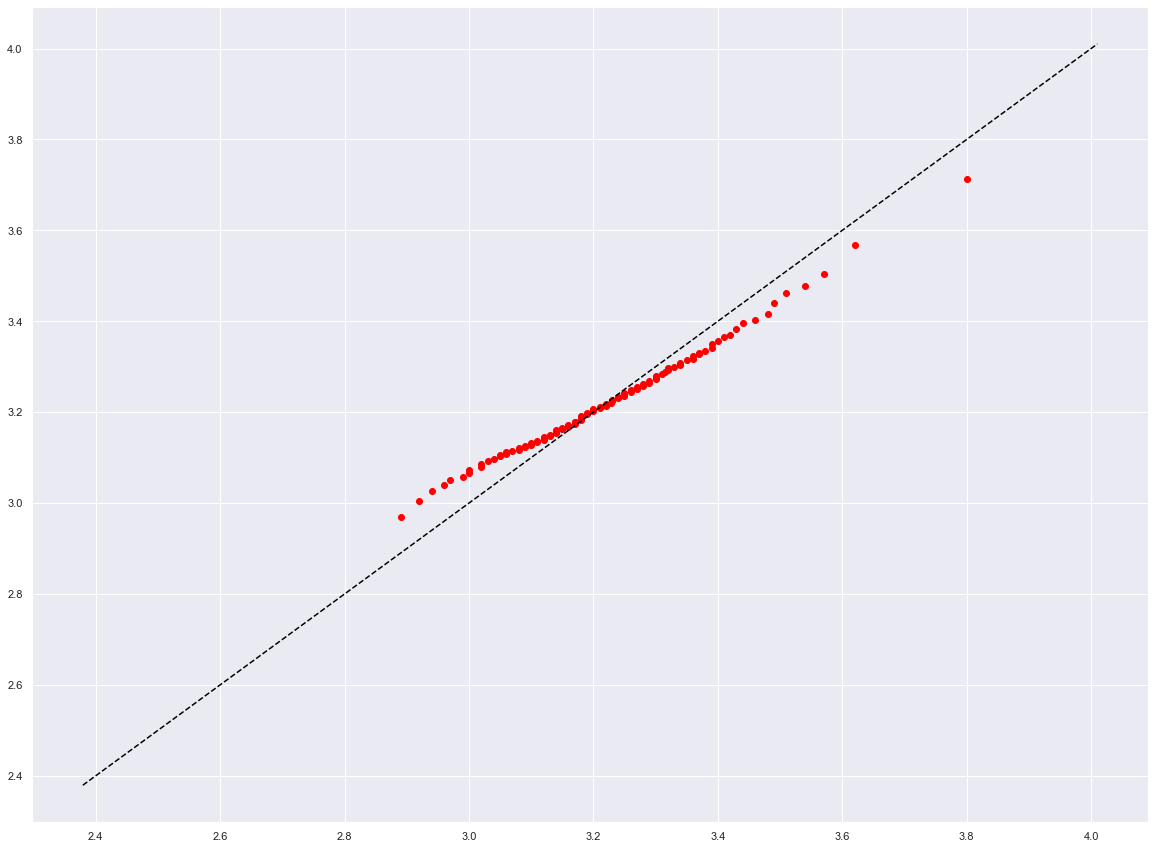

In [118]:
min_v=np.min([Y_pred.min(),subsample_Y.min()])
max_v=np.max([Y_pred.max(),subsample_Y.max()])
x = np.linspace(min_v, max_v)
q_spl=100
q = np.linspace(0.01, 0.999, num=q_spl)
data_q = np.quantile(subsample_Y, q)
predicted_data=np.quantile(Y_pred,q)


plt.plot(data_q,predicted_data,color="red",marker="o", ls="",label="MLE")
plt.plot(x,x,ls="--",color="black")
'''
plt.legend()
plt.xlim(np.min(data), np.max(data))
plt.ylim(np.min(data), np.max(data))

plt.title(params["feature"]+": "+params["distribution"]+" distribution")
plt.xlabel("Emperical distribution")
plt.ylabel("Theoretical distribution")
'''

<h3>Step 7. Analyze the quality of regression model (distribution of residuals, determination coefficient).</h3>

In [120]:
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
dc=lin_reg.score(X_test,Y_test)

print("R squared: " ,R2)
print("MSE: ",mse)
print("MAE: ",mae)
print("Determination coefficient: ", dc )

R squared:  0.5958439729994779
MSE:  0.010719404150749278
MAE:  0.07922944780182085
Determination coefficient:  0.5958439729994779


In [121]:
#Residuals
res=Y_test-Y_pred
res

3563   -0.220008
4895   -0.181872
263    -0.049694
1818    0.098601
1452    0.064885
          ...   
4351    0.007440
5617    0.048903
5609   -0.036775
1025    0.115853
6253   -0.050891
Name: pH, Length: 1500, dtype: float64

In [122]:
res.mean()

-0.004720892309503334

[Text(0, 0.5, 'Probability density'), Text(0.5, 0, 'Y_test-Y_pred')]

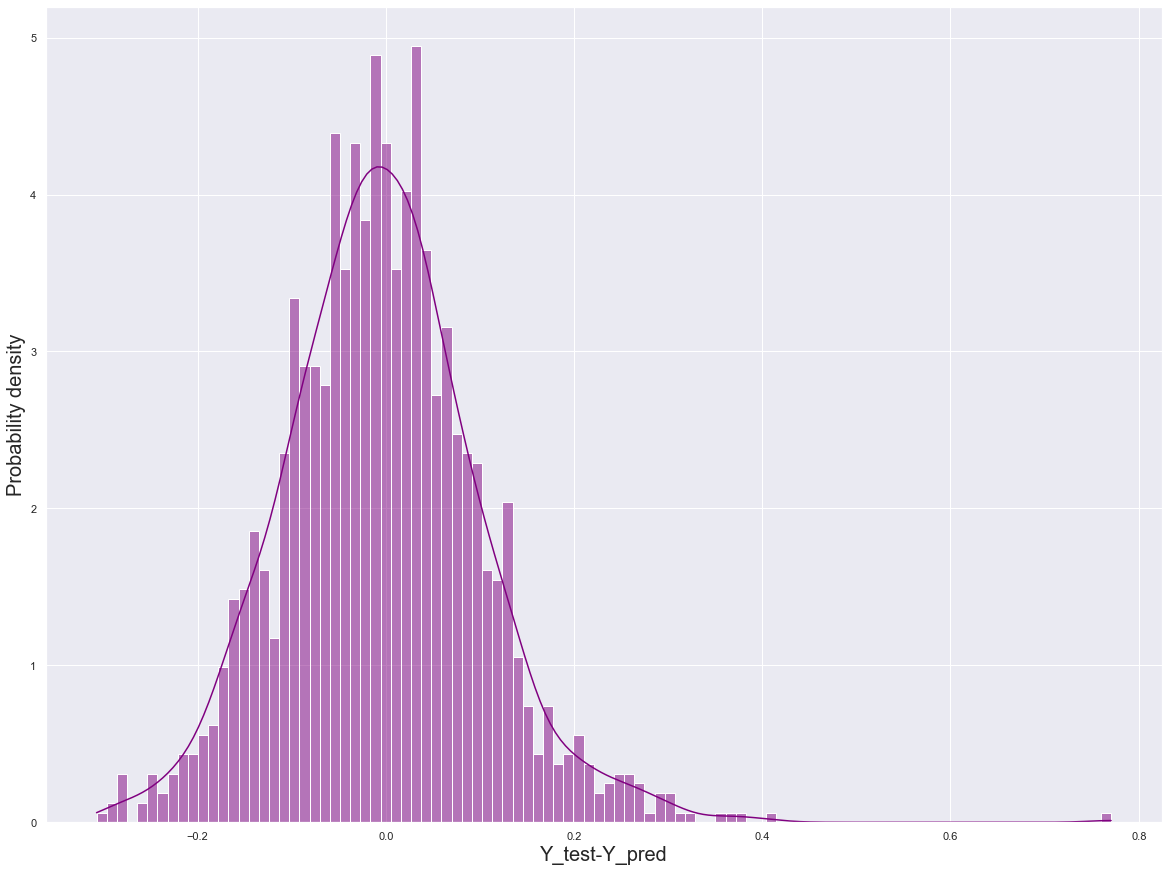

In [128]:
ax=sns.histplot(res,stat="density",bins=100,common_norm=False,color="purple",kde=True)
ax.set(ylabel="Probability density",xlabel="Y_test-Y_pred")